Dataset Description:
Index	Variable	Description
1.	hotel  -------                 	Type of hotel (Resort Hotel, City Hotel)
2.	is_canceled -------                 	Reservation cancellation status (0 = not canceled, 1 = canceled)
3.	lead_time -------                 	Number of days between booking and arrival
4.	arrival_date_year -------                 	Year of arrival
5.	arrival_date_month -------                 	Month of arrival
6.	arrival_date_week_number -------                 	Week number of the year for arrival
7.	arrival_date_day_of_month -------                 	Day of the month of arrival
8.	stays_in_weekend_nights -------                 	Number of weekend nights (Saturday and Sunday) the guest stayed or booked
9.	stays_in_week_nights -------                 	Number of week nights the guest stayed or booked
10.	adults -------                 	Number of adults
11.	children -------                 	Number of children
12.	babies -------                 	Number of babies
13.	meal -------                 	Type of meal booked (BB, FB, HB, SC, Undefined)
14.	country -------                 	Country of origin of the guest
15.	market_segment -------                 	Market segment designation
16.	distribution_channel -------                 	Booking distribution channel
17.	is_repeated_guest -------                 	If the guest is a repeat customer (0 = not repeated, 1 = repeated)
18.	previous_cancellations -------                 	Number of previous bookings that were canceled by the customer
19.	previous_bookings_not_canceled -------                 	Number of previous bookings that were not canceled by the customer
20.	reserved_room_type -------                 	Type of reserved room
21.	assigned_room_type -------                 	Type of assigned room
22.	booking_changes -------                 	Number of changes made to the booking
23.	deposit_type -------                 	Type of deposit made (No Deposit, Refundable, Non Refund)
24.	agent -------                 	ID of the travel agent responsible for the booking
25.	company -------                 	ID of the company responsible for the booking
26.	days_in_waiting_list -------                 	Number of days the booking was in the waiting list
27.	customer_type -------                 	Type of customer (Transient, Contract, Transient-Party, Group)
28.	adr -------                 	Average Daily Rate
29.	required_car_parking_spaces -------                 	Number of car parking spaces required
30.	total_of_special_requests -------                 	Number of special requests made
31.	reservation_status -------                 	Last reservation status (Check-Out, Canceled, No-Show)
32.	reservation_status_date -------                 	Date of the last reservation status
33.	name -------                 	Guest's name
34.	email -------                 	Guest's email address
35.	phone-number -------                 	Guest's phone number
36.	credit_card -------                 	Last four digits of the guest's credit card

#### Importing important libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

# import chi2
from sklearn.feature_selection import chi2

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#### Reading the File

In [2]:
data = pd.read_csv(r"C:\Susovan Das\One Drive\OneDrive\Desktop\Desktop files\hotel_booking.csv")

In [3]:
df = data.copy()

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
data.shape

(119390, 36)

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
data.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

#### Dropping unwanted columns

In [8]:
data.drop(["credit_card", "email", "name", "phone-number","country"], axis=1, inplace=True)

In [9]:
data.shape

(119390, 31)

In [10]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,2015-07-03


In [11]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type            

In [12]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

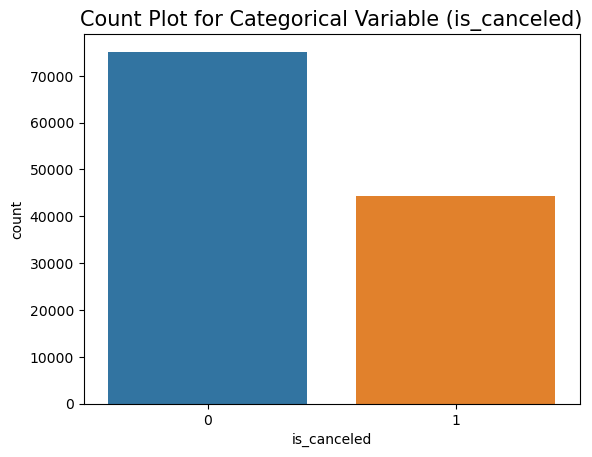

In [13]:
sns.countplot(x=data.is_canceled)
plt.title('Count Plot for Categorical Variable (is_canceled)', fontsize = 15)
plt.show()

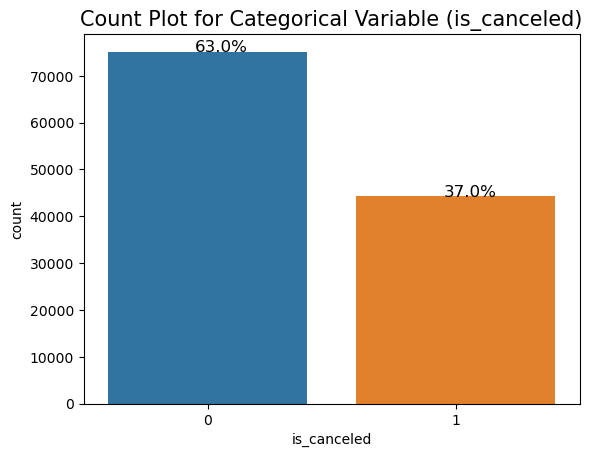

In [14]:

# Assuming `data` is your DataFrame and `is_canceled` is the column of interest
total = len(data)
ax = sns.countplot(x=data.is_canceled)

# Calculate percentages
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), size = 12)

plt.title('Count Plot for Categorical Variable (is_canceled)', fontsize=15)
plt.show()

#### Checking for Null values in our Dataset

In [15]:
Total = data.isnull().sum().sort_values(ascending=False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
company,112593,94.306893
agent,16340,13.686238
children,4,0.003350
hotel,0,0.000000
previous_cancellations,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000


In [16]:
# Dropping Company column because it contains 94% missing data
data.drop(["company"], axis=1, inplace=True)

In [17]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.000000,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.000000,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,0,Transient,107.000000,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.000000,0,FB,Direct,Direct,0,0,0,C,C,0,No Deposit,303.000000,0,Transient,103.000000,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,82.000000,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.000000,0,HB,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.000000,0,Transient,105.500000,0,0,Canceled,2015-04-22


In [18]:
# Deleting null rows in 'agent' column
delete = data[pd.isna(data['agent'])]

In [19]:
delete.shape

(16340, 30)

In [20]:
data.drop(delete.index, inplace=True)

In [21]:
data.shape

(103050, 30)

In [22]:
# Deleting null rows in 'children' column
delete2 = data[pd.isna(data['children'])]

In [23]:
delete2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.000000,0,Transient-Party,12.000000,0,1,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.000000,0,Transient-Party,76.500000,0,1,Canceled,2015-08-09


In [24]:
data.drop(delete2.index, inplace=True)

In [25]:
data.shape

(103048, 30)

In [26]:
Total = data.isnull().sum().sort_values(ascending=False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
hotel,0,0.000000
is_canceled,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000
days_in_waiting_list,0,0.000000
agent,0,0.000000
deposit_type,0,0.000000


In [27]:
data['guests'] = data['adults'] + data['children'] + data['babies']

In [28]:
data['guests'] = data['guests'].astype(int)
data.drop(['adults','children','babies'], axis=1, inplace=True)

In [29]:
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['total_stay'] = data['total_stay'].astype(int)
data.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1, inplace=True)

In [30]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,guests,total_stay
3,Resort Hotel,0,13,2015,July,27,1,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.000000,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.000000,0,1,Check-Out,2015-07-03,2,2
5,Resort Hotel,0,14,2015,July,27,1,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.000000,0,1,Check-Out,2015-07-03,2,2
7,Resort Hotel,0,9,2015,July,27,1,FB,Direct,Direct,0,0,0,C,C,0,No Deposit,303.000000,0,Transient,103.000000,0,1,Check-Out,2015-07-03,2,2
8,Resort Hotel,1,85,2015,July,27,1,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,82.000000,0,1,Canceled,2015-05-06,2,3


In [31]:
y = data['is_canceled']

In [32]:
y.shape

(103048,)

In [33]:
# filter the numerical features in the dataset
data_num = data.select_dtypes(include = [np.number])
data_num.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'guests', 'total_stay'],
      dtype='object')

In [34]:
data_num.shape

(103048, 16)

In [35]:
# filter the categorical features in the dataset
data_cat = data.select_dtypes(include=[object])
data_cat.columns


Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [36]:
data_cat.shape

(103048, 11)

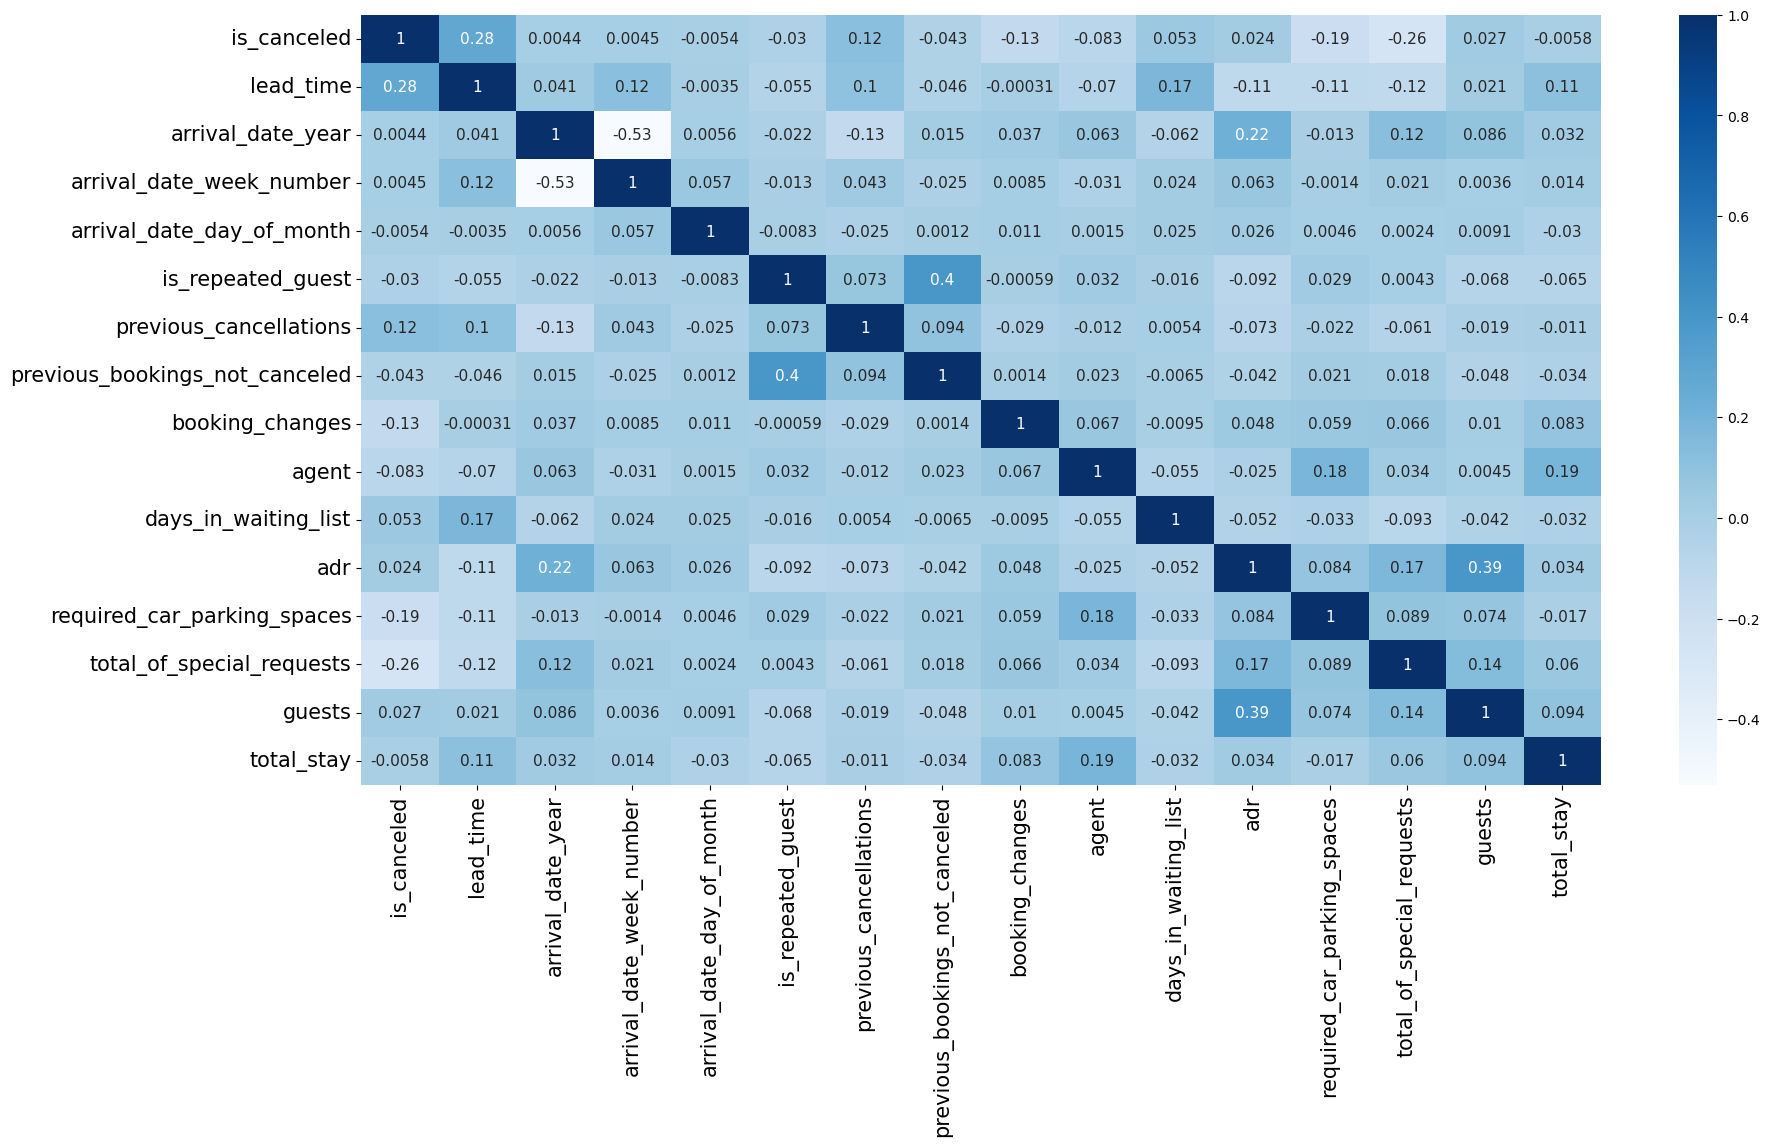

In [37]:


# Set the plot size
plt.figure(figsize=(20, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(data_num.corr(), annot=True, annot_kws={"size": 11}, cmap='Blues')

# Rotate the y-axis labels horizontally and set text size
plt.yticks(rotation=0, fontsize=15)

# Set text size for x-axis labels
plt.xticks(fontsize=15)

# Display the plot
plt.show()


In [38]:
# Get the summary statistics for categorical variables
data_cat.describe(include='object').T

,count,unique,top,freq
hotel,103048,2,City Hotel,71197
arrival_date_month,103048,12,August,12680
meal,103048,5,BB,77779
market_segment,103048,7,Online TA,56128
distribution_channel,103048,4,TA/TO,94703
reserved_room_type,103048,8,A,73394
assigned_room_type,103048,10,A,64579
deposit_type,103048,3,No Deposit,90464
customer_type,103048,4,Transient,77884
reservation_status,103048,3,Check-Out,62856


It is clear from the plot that all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0).

This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

In [39]:
data_cat.drop(['reservation_status'], axis=1, inplace=True)

In [40]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,103048.000000,0.390032,0.487759,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,103048.000000,111.674336,107.671506,0.000000,26.000000,79.000000,169.000000,629.000000
arrival_date_year,103048.000000,2016.156510,0.706216,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
arrival_date_week_number,103048.000000,27.339327,13.285300,1.000000,17.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,103048.000000,15.784198,8.794013,1.000000,8.000000,16.000000,24.000000,31.000000
is_repeated_guest,103048.000000,0.014023,0.117584,0.000000,0.000000,0.000000,0.000000,1.000000
previous_cancellations,103048.000000,0.077216,0.757689,0.000000,0.000000,0.000000,0.000000,26.000000
previous_bookings_not_canceled,103048.000000,0.024862,0.436639,0.000000,0.000000,0.000000,0.000000,50.000000
booking_changes,103048.000000,0.201702,0.624797,0.000000,0.000000,0.000000,0.000000,18.000000
agent,103048.000000,86.694841,110.775127,1.000000,9.000000,14.000000,229.000000,535.000000


As we are Predicting for the Future thats why we are dropping those columns, who are linked with previous Data, Time and Year

In [41]:
data_cat.drop(['reservation_status_date','arrival_date_month'], axis=1, inplace=True)

In [42]:
data_num.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','agent'], axis=1, inplace=True)

In [43]:
data_cat.columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [44]:
data_num.columns

Index(['is_canceled', 'lead_time', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'guests',
       'total_stay'],
      dtype='object')

In [45]:
data_cat.describe(include='object').T

,count,unique,top,freq
hotel,103048,2,City Hotel,71197
meal,103048,5,BB,77779
market_segment,103048,7,Online TA,56128
distribution_channel,103048,4,TA/TO,94703
reserved_room_type,103048,8,A,73394
assigned_room_type,103048,10,A,64579
deposit_type,103048,3,No Deposit,90464
customer_type,103048,4,Transient,77884


In [46]:
data_cat.meal.value_counts()

BB           77779
HB           13433
SC           10334
Undefined      831
FB             671
Name: meal, dtype: int64

In [47]:
# Replace 'Undefined' with the mode[0]
meal_mode = data_cat.meal.mode()[0]
data_cat.meal = data_cat.meal.replace('Undefined', meal_mode)

# -- LOGISTICS REGRESSION --

## EDA

### Checking and Treating Outliers

#### data_num['lead_time']

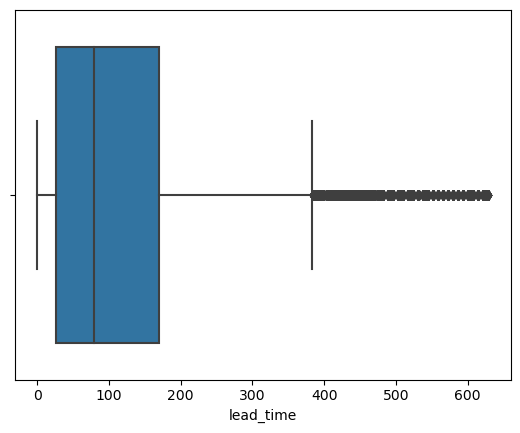

In [48]:
sns.boxplot(x=data_num['lead_time'])
plt.show()

In [49]:
Q1_lead_time = data_num['lead_time'].quantile(0.25)
Q3_lead_time = data_num['lead_time'].quantile(0.75)
IQR = Q3_lead_time - Q1_lead_time
lower_bound_lead_time = Q1_lead_time - 1.5 * IQR
upper_bound_lead_time = Q3_lead_time + 1.5 * IQR

In [50]:
data_num['lead_time'] = data_num['lead_time'].clip(lower_bound_lead_time, upper_bound_lead_time)

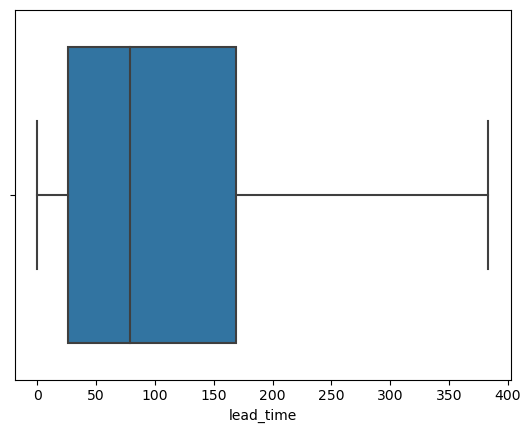

In [51]:
sns.boxplot(x=data_num['lead_time'])
plt.show()

#### data_num['stays_in_weekend_nights']

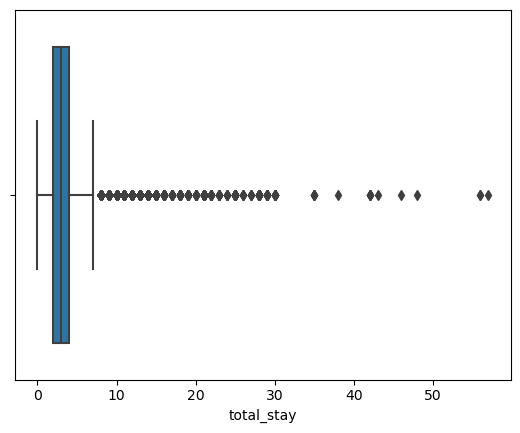

In [52]:
sns.boxplot(x=data_num['total_stay'])
plt.show()

In [53]:
Q1_total_stay = data_num['total_stay'].quantile(0.25)
Q3_total_stay = data_num['total_stay'].quantile(0.75)
IQR = Q3_total_stay - Q1_total_stay
lower_bound_total_stay = Q1_total_stay - 1.5 * IQR
upper_bound_total_stay = Q3_total_stay + 1.5 * IQR

In [54]:
data_num['total_stay'] = data_num['total_stay'].clip(lower_bound_total_stay, upper_bound_total_stay)

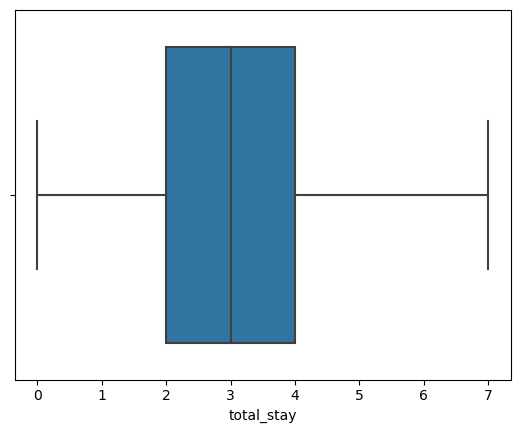

In [55]:
sns.boxplot(x=data_num['total_stay'])
plt.show()

#### data_num['adults']

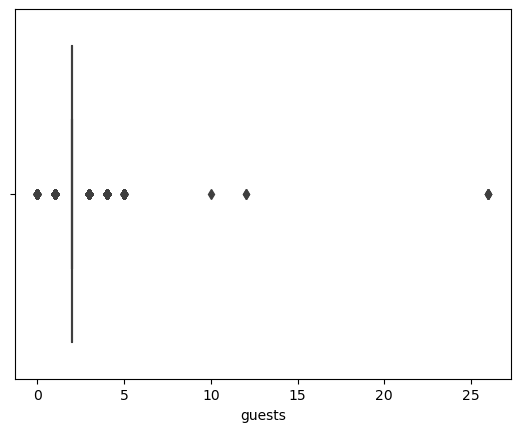

In [56]:
sns.boxplot(x=data_num['guests'])
plt.show()

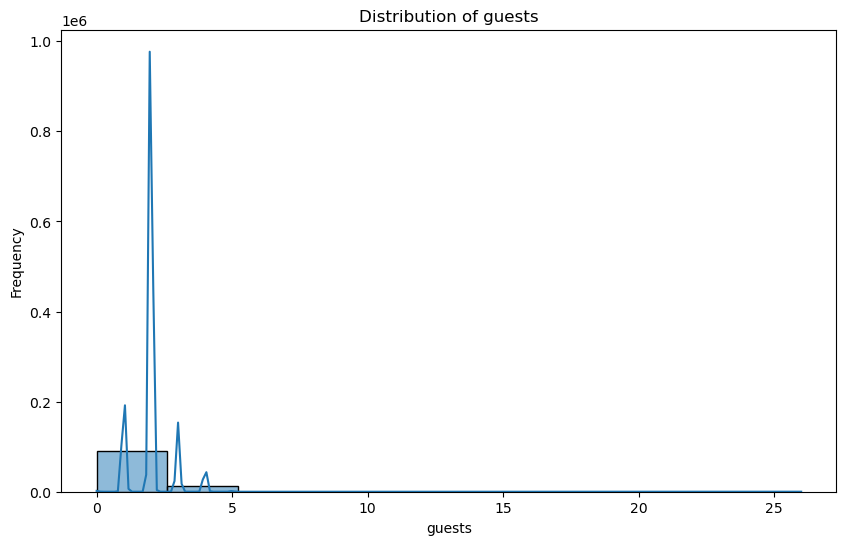

In [57]:
# Plot the distribution of adults
plt.figure(figsize=(10, 6))
sns.histplot(data_num['guests'], bins=10, kde=True)
plt.title('Distribution of guests')
plt.xlabel('guests')
plt.ylabel('Frequency')
plt.show()

In [58]:
data_num.guests.value_counts()

2     74167
1     15325
3      9659
4      3664
0       120
5       105
26        5
12        2
10        1
Name: guests, dtype: int64

In [59]:
# Replace 26 and 0 with the mode[0]
guests_mode = data_num.guests.mode()[0]
data_num.guests = data_num.guests.replace([26, 0], guests_mode)

In [60]:
data_num.guests.value_counts()

2     74292
1     15325
3      9659
4      3664
5       105
12        2
10        1
Name: guests, dtype: int64

#### data_num['previous_cancellations']

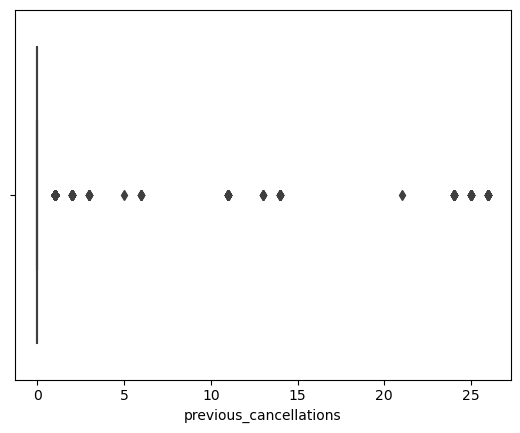

In [61]:
sns.boxplot(x=data_num['previous_cancellations'])
plt.show()

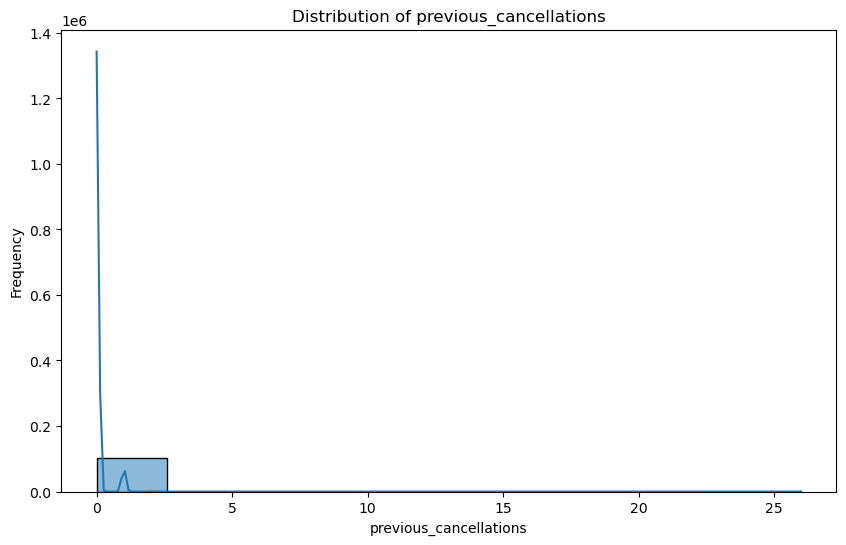

In [62]:
# Plot the distribution of previous_cancellations
plt.figure(figsize=(10, 6))
sns.histplot(data_num['previous_cancellations'], bins=10, kde=True)
plt.title('Distribution of previous_cancellations')
plt.xlabel('previous_cancellations')
plt.ylabel('Frequency')
plt.show()

In [63]:
data_num.previous_cancellations.value_counts()

0     97481
1      5396
2        36
26       26
25       25
11       25
24       24
14       14
3         9
6         6
13        4
21        1
5         1
Name: previous_cancellations, dtype: int64

In [64]:
# Replace [26, 25, 11, 24, 14, 13, 21] with the mode[0]
previous_cancellations_mode = data_num.previous_cancellations.mode()[0]
data_num.previous_cancellations = data_num.previous_cancellations.replace([26, 25, 11, 24, 14, 13, 21], previous_cancellations_mode)

#### data_num['previous_bookings_not_canceled']

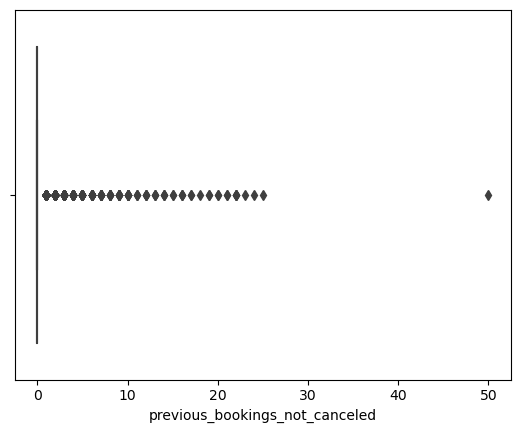

In [65]:
sns.boxplot(x=data_num['previous_bookings_not_canceled'])
plt.show()

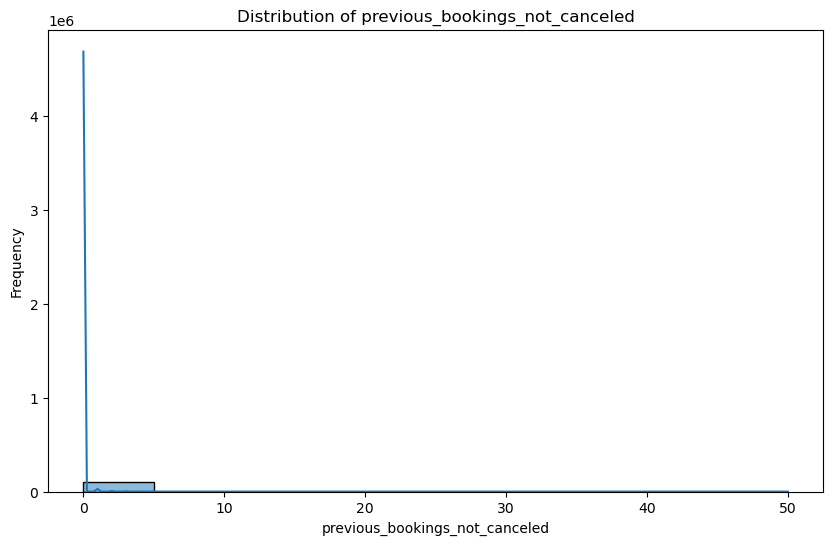

In [66]:
# Plot the distribution of previous_bookings_not_canceled
plt.figure(figsize=(10, 6))
sns.histplot(data_num['previous_bookings_not_canceled'], bins=10, kde=True)
plt.title('Distribution of previous_bookings_not_canceled')
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('Frequency')
plt.show()

In [67]:
data_num.previous_bookings_not_canceled.value_counts()

0     102026
1        632
2        149
3         63
4         45
5         38
6         22
7         12
9          9
10         9
8          8
22         4
12         4
16         3
13         3
14         3
11         3
15         2
17         2
19         2
20         2
21         2
18         1
23         1
24         1
25         1
50         1
Name: previous_bookings_not_canceled, dtype: int64

In [68]:
# Replace [9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 50] with the mode[0]
previous_bookings_not_canceled_mode = data_num.previous_bookings_not_canceled.mode()[0]
data_num.previous_bookings_not_canceled = data_num.previous_bookings_not_canceled.replace([9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 50], previous_bookings_not_canceled_mode)

#### data_num['booking_changes']

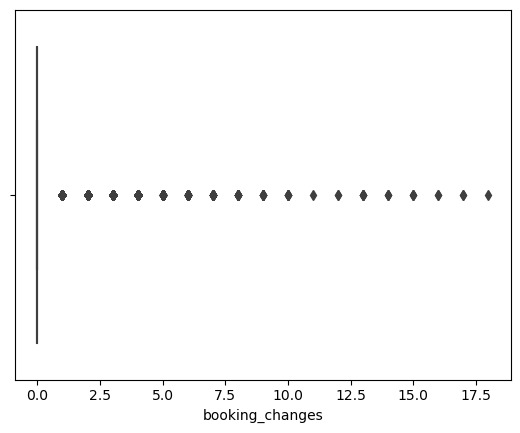

In [69]:
sns.boxplot(x=data_num['booking_changes'])
plt.show()

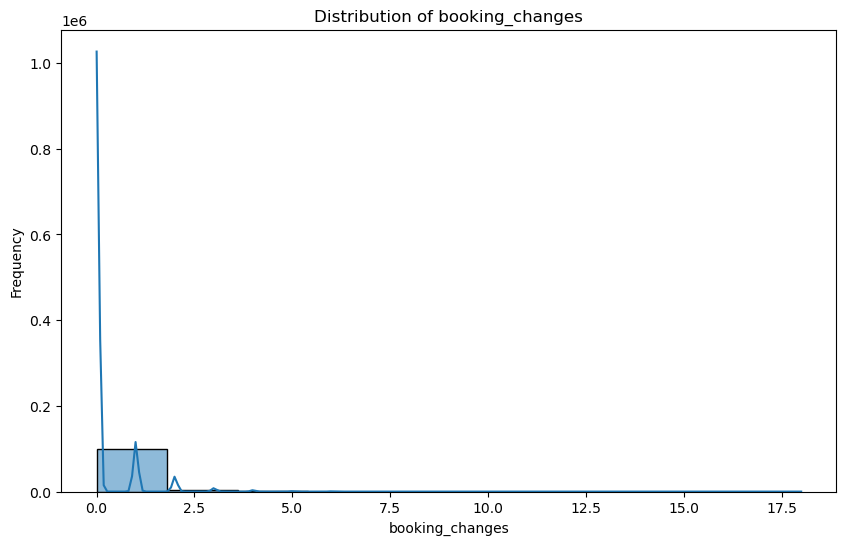

In [70]:
# Plot the distribution of booking_changes
plt.figure(figsize=(10, 6))
sns.histplot(data_num['booking_changes'], bins=10, kde=True)
plt.title('Distribution of booking_changes')
plt.xlabel('booking_changes')
plt.ylabel('Frequency')
plt.show()

In [71]:
data_num.booking_changes.value_counts()

0     88783
1     10031
2      3041
3       696
4       287
5        83
6        54
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        2
18        1
11        1
Name: booking_changes, dtype: int64

In [72]:
# Replace [11, 12, 13, 14, 15, 17, 16, 17, 18] with the mode[0]
booking_changes_mode = data_num.booking_changes.mode()[0]
data_num.booking_changes = data_num.booking_changes.replace([11, 12, 13, 14, 15, 17, 16, 17, 18], booking_changes_mode)

#### data_num['days_in_waiting_list']

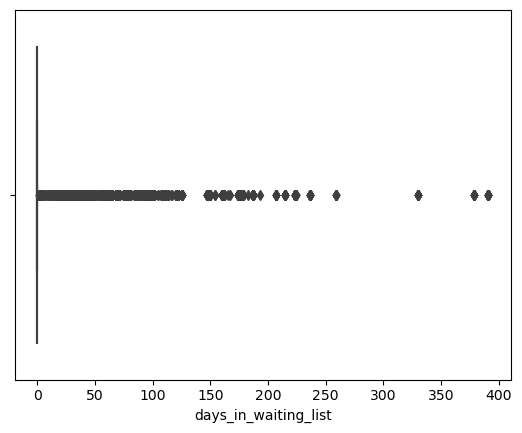

In [73]:
sns.boxplot(x=data_num['days_in_waiting_list'])
plt.show()

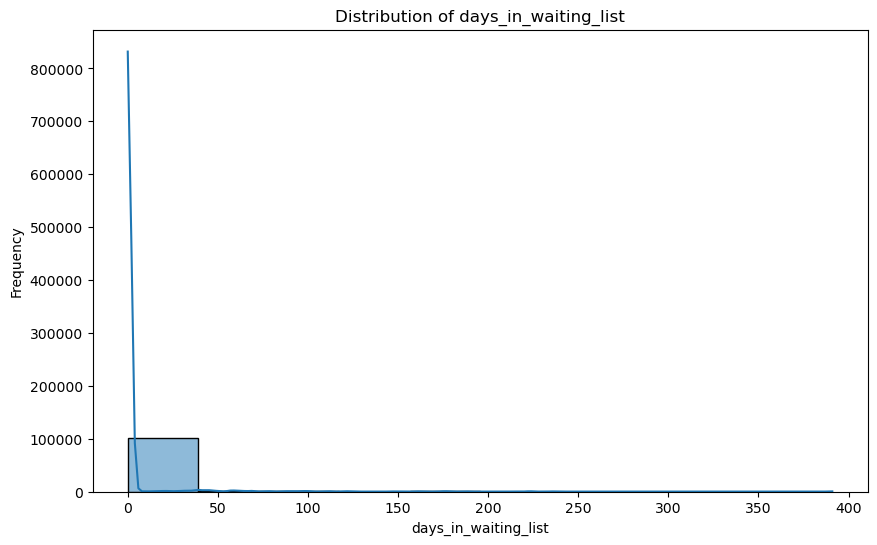

In [74]:
# Plot the distribution of days_in_waiting_list
plt.figure(figsize=(10, 6))
sns.histplot(data_num['days_in_waiting_list'], bins=10, kde=True)
plt.title('Distribution of days_in_waiting_list')
plt.xlabel('days_in_waiting_list')
plt.ylabel('Frequency')
plt.show()

In [75]:
data_num.days_in_waiting_list.value_counts()

0      99509
39       226
58       164
44       140
31       107
35        96
46        92
69        89
63        83
87        80
50        79
38        75
111       71
45        65
101       65
77        63
41        63
223       61
62        60
98        59
3         59
22        56
122       54
15        52
48        52
91        50
176       50
28        49
17        47
96        46
56        45
391       45
187       45
68        42
93        38
21        36
65        35
236       35
42        30
33        30
147       30
162       30
19        30
178       30
60        29
40        28
10        27
34        26
20        26
27        26
57        25
120       25
160       25
80        23
4         22
215       21
79        20
108       20
25        20
75        20
24        19
174       19
43        19
61        18
49        18
70        18
32        18
99        16
125       16
85        15
207       15
6         15
330       15
379       15
9         13
59        12
150       11

#### data_num['adr']

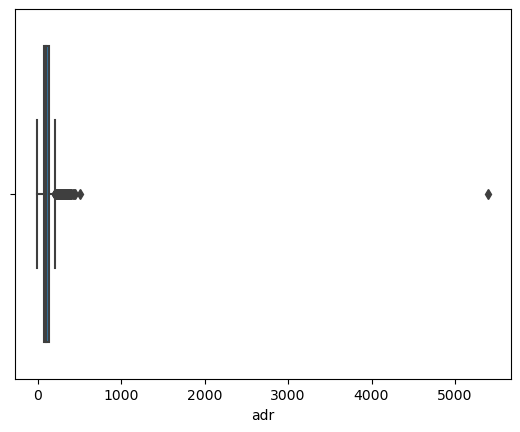

In [76]:
sns.boxplot(x=data_num['adr'])
plt.show()

In [77]:
Q1_adr = data_num['adr'].quantile(0.25)
Q3_adr = data_num['adr'].quantile(0.75)
IQR = Q3_adr - Q1_adr
lower_bound_adr = Q1_adr - 1.5 * IQR
upper_bound_adr = Q3_adr + 1.5 * IQR

In [78]:
data_num['adr'] = data_num['adr'].clip(lower_bound_adr, upper_bound_adr)

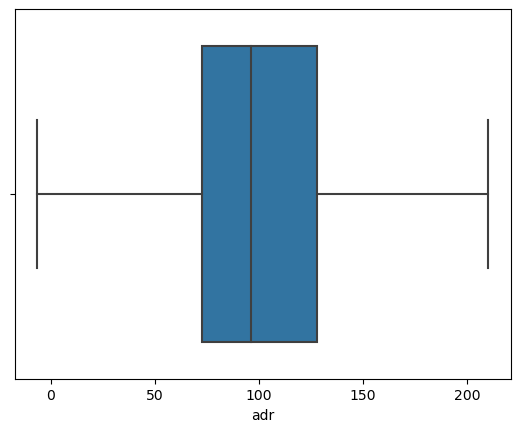

In [79]:
sns.boxplot(x=data_num['adr'])
plt.show()

#### data_num['required_car_parking_spaces']

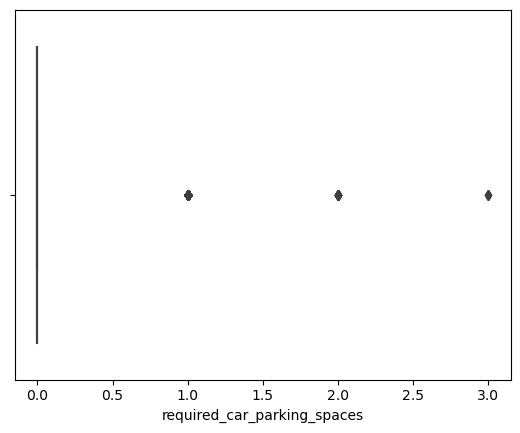

In [80]:
sns.boxplot(x=data_num['required_car_parking_spaces'])
plt.show()

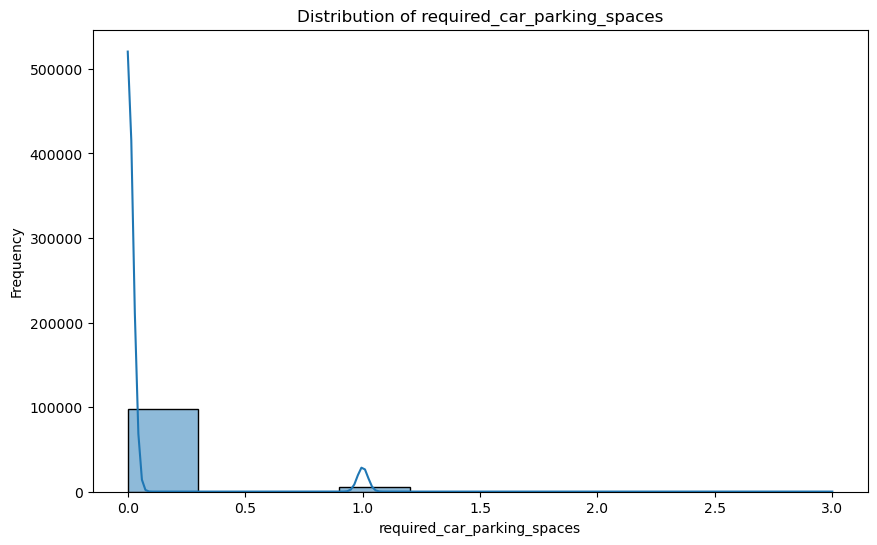

In [81]:
# Plot the distribution of required_car_parking_spaces
plt.figure(figsize=(10, 6))
sns.histplot(data_num['required_car_parking_spaces'], bins=10, kde=True)
plt.title('Distribution of required_car_parking_spaces')
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Frequency')
plt.show()

In [82]:
data_num.required_car_parking_spaces.value_counts()

0    97590
1     5435
2       20
3        3
Name: required_car_parking_spaces, dtype: int64

#### data_num['total_of_special_requests']

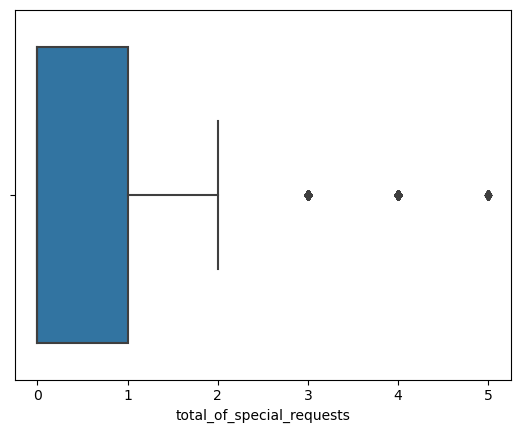

In [83]:
sns.boxplot(x=data_num['total_of_special_requests'])
plt.show()

In [84]:
data_num.total_of_special_requests.value_counts()

0    58045
1    30488
2    11981
3     2233
4      272
5       29
Name: total_of_special_requests, dtype: int64

## Checking Multicollinearity

In [85]:
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]

vif["Features"] = data_num.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,9.939751,guests
1,7.752757,adr
2,4.084539,total_stay
3,2.527329,lead_time
4,2.060673,is_canceled
5,1.780701,total_of_special_requests
6,1.319792,is_repeated_guest
7,1.282761,previous_bookings_not_canceled
8,1.232263,previous_cancellations
9,1.144139,booking_changes


In [86]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(data_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(data_num.values, i) for i in range(data_num.shape[1])]

    # create a column of variable names
    vif["Features"] = data_num.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        data_num = data_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                        Features
0     2.060673                     is_canceled
1     2.527329                       lead_time
2     1.319792               is_repeated_guest
3     1.232263          previous_cancellations
4     1.282761  previous_bookings_not_canceled
5     1.144139                 booking_changes
6     1.057104            days_in_waiting_list
7     7.752757                             adr
8     1.113559     required_car_parking_spaces
9     1.780701       total_of_special_requests
10    9.939751                          guests
11    4.084539                      total_stay


#### Creating dummies out of Categorical Variable

In [87]:
data_cat_dummy = pd.get_dummies(data=data_cat, columns=data_cat.columns, drop_first=True)

In [88]:
data_cat_dummy.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [89]:
data_cat_dummy.shape

(103048, 34)

In [90]:
y.head()

3    0
4    0
5    0
7    0
8    1
Name: is_canceled, dtype: int64

In [91]:
y.shape

(103048,)

## Finding out Correlation between categorical variables and y variable by chi_square test

In [92]:
chi_scores = chi2(data_cat_dummy, y)

In [93]:
chi_scores

(array([9.77721695e+02, 1.26826710e+02, 9.33852529e+01, 4.36466593e+00,
        3.23914454e+01, 6.28896396e+01, 1.23872217e+03, 4.18694201e+03,
        2.63594890e+02, 1.07606613e+02, 1.13702203e+03, 3.09407710e+01,
        9.32941879e+01, 6.09010476e+00, 3.26435529e+00, 2.54257907e+02,
        1.36014146e+02, 3.83952503e+01, 8.96403575e-01, 7.42982941e+00,
        1.49909377e+02, 2.69318946e+02, 1.28269760e+03, 3.51197483e+02,
        1.72878052e+02, 2.24823076e+01, 3.03811236e-01, 1.62972316e+02,
        1.08806118e+02, 1.93290438e+04, 2.43987744e+00, 1.88562764e+02,
        5.02297354e+02, 1.35840018e+03]),
 array([1.24974337e-214, 2.02724037e-029, 4.30446030e-022, 3.66916768e-002,
        1.26040112e-008, 2.18619175e-015, 2.34424285e-271, 0.00000000e+000,
        2.82446521e-059, 3.27789646e-025, 2.96810111e-249, 2.66024087e-008,
        4.50713710e-022, 1.35941027e-002, 7.08008479e-002, 3.06343258e-057,
        1.98113943e-031, 5.77728357e-010, 3.43747879e-001, 6.41514229e-003,
  

<AxesSubplot:>

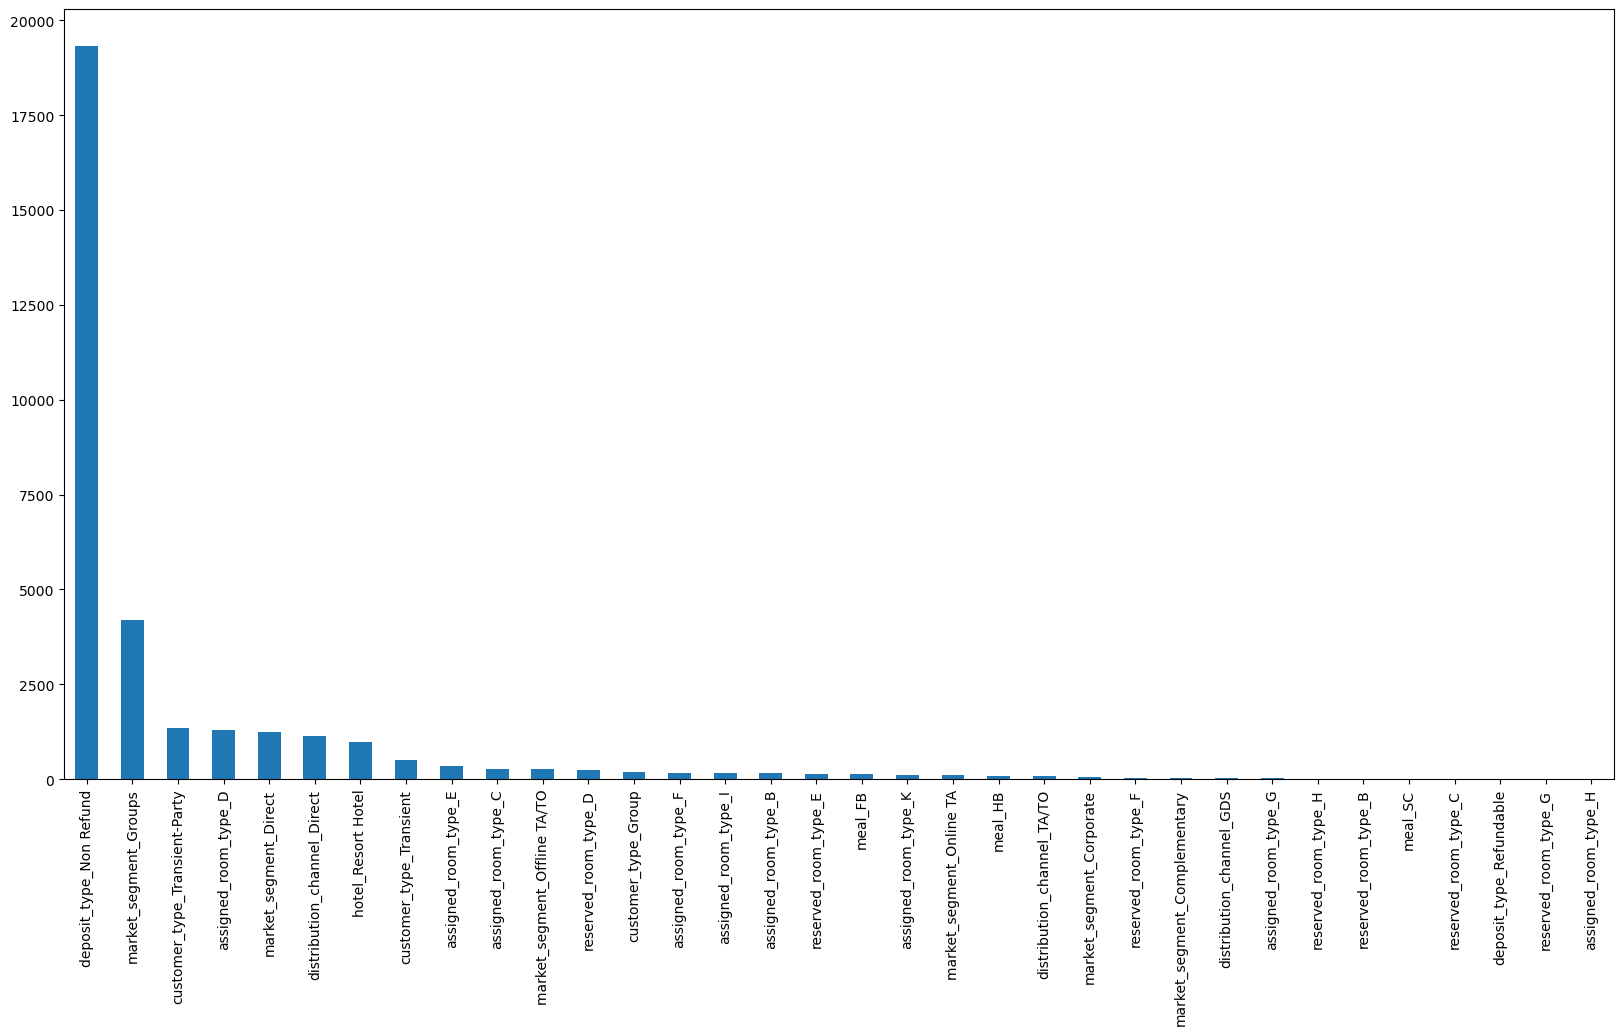

In [94]:
# Higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=data_cat_dummy.columns)
chi_values.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20, 10))
chi_values.plot.bar()

<AxesSubplot:>

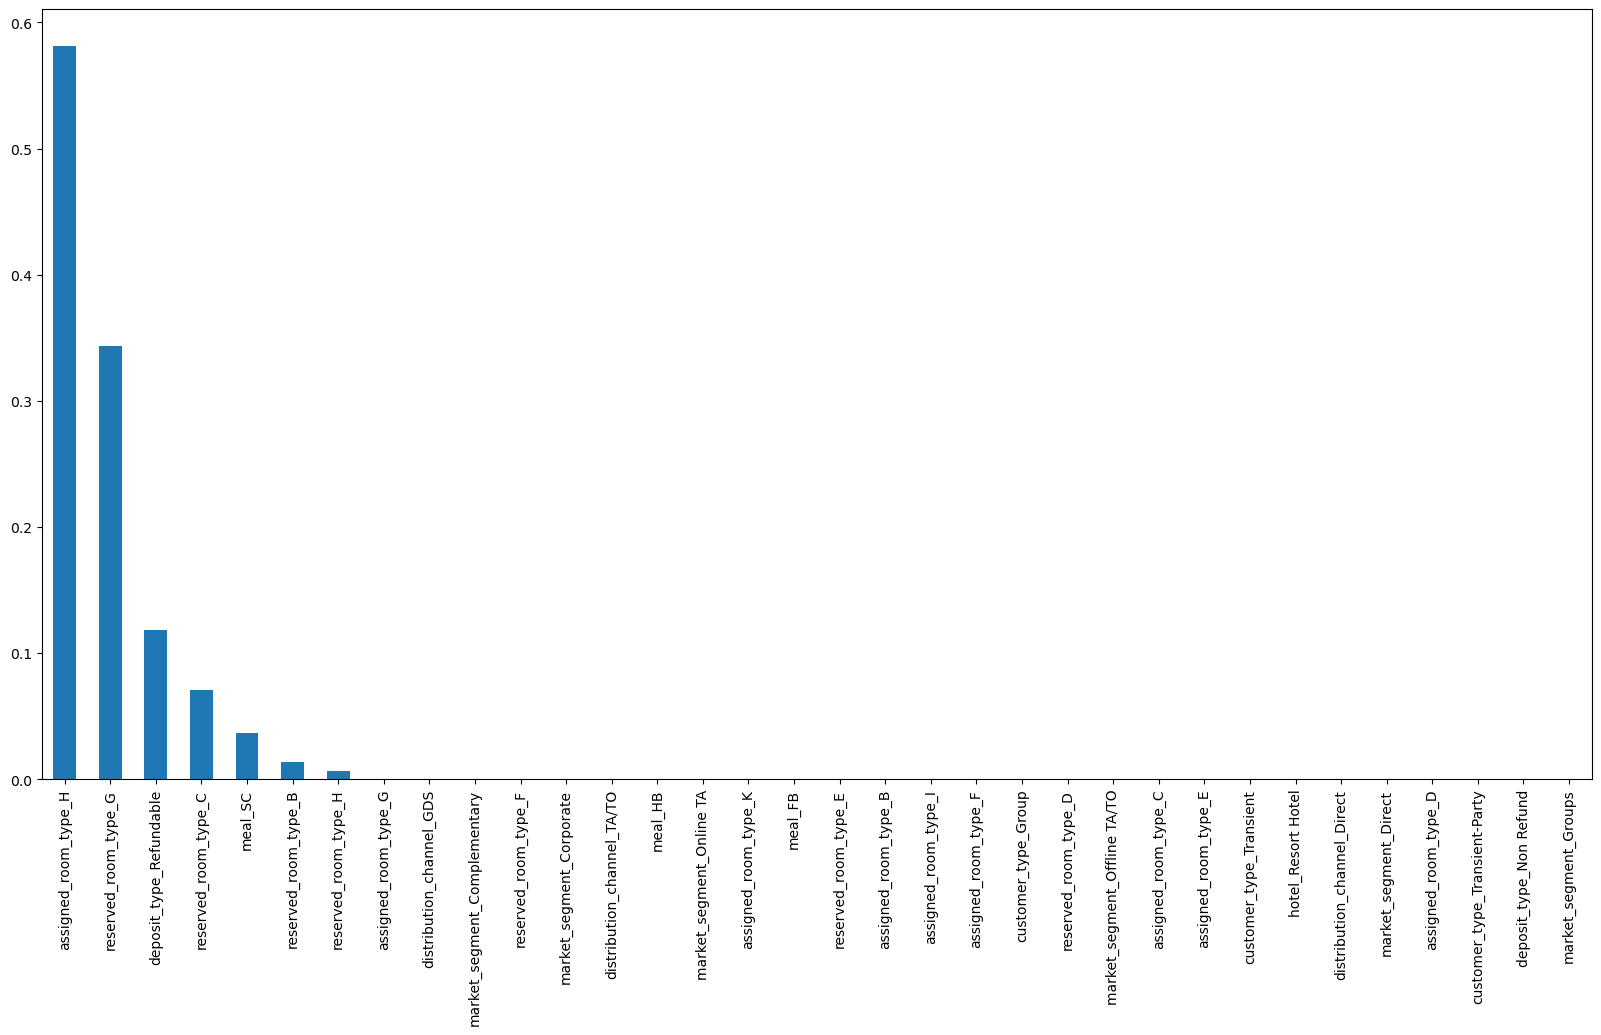

In [95]:
# if p-value > 0.5, lower the importance
p_values = pd.Series(chi_scores[1], index=data_cat_dummy.columns)
p_values.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20, 10))
p_values.plot.bar()

In [96]:
# As "assigned_room_type_H" has p-value higher tha 0.5, therefore we are dropping this column
data_cat_dummy.drop("assigned_room_type_H", axis=1, inplace=True)

In [97]:
data_cat_dummy.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
data_cat_dummy.shape

(103048, 33)

In [99]:
data_num.head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,total_stay
3,0,13.000000,0,0,0,0,0,75.000000,0,0,1,1.000000
4,0,14.000000,0,0,0,0,0,98.000000,0,1,2,2.000000
5,0,14.000000,0,0,0,0,0,98.000000,0,1,2,2.000000
7,0,9.000000,0,0,0,0,0,103.000000,0,1,2,2.000000
8,1,85.000000,0,0,0,0,0,82.000000,0,1,2,3.000000


In [100]:
data_num.drop(["is_canceled"], axis=1, inplace=True)

In [101]:
data_num.shape

(103048, 11)

In [102]:
data_num.head()

,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,total_stay
3,13.000000,0,0,0,0,0,75.000000,0,0,1,1.000000
4,14.000000,0,0,0,0,0,98.000000,0,1,2,2.000000
5,14.000000,0,0,0,0,0,98.000000,0,1,2,2.000000
7,9.000000,0,0,0,0,0,103.000000,0,1,2,2.000000
8,85.000000,0,0,0,0,0,82.000000,0,1,2,3.000000


In [103]:
data_cat_dummy.shape

(103048, 33)

In [104]:
data_cat_dummy.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Scale the numerical variable

In [105]:
# initialize the standard scalar
x_scaler = StandardScaler()
num_scaled = x_scaler.fit_transform(data_num)

# create a dataframe of scaled numerical variables
data_num_scaled = pd.DataFrame(num_scaled, columns = data_num.columns)

In [106]:
data_num_scaled.head()

,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,total_stay
0,-0.949254,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.650842,-0.235772,-0.757451,-1.619964,-1.273215
1,-0.939462,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.123300,-0.235772,0.493772,-0.030918,-0.735591
2,-0.939462,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.123300,-0.235772,0.493772,-0.030918,-0.735591
3,-0.988425,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.008617,-0.235772,0.493772,-0.030918,-0.735591
4,-0.244176,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.490286,-0.235772,0.493772,-0.030918,-0.197967


In [107]:
data_num_scaled.shape

(103048, 11)

## Concating Numerical scaled variables with dummied categorical variables

In [108]:
data_num_scaled = data_num_scaled.reset_index(drop=True)
data_cat_dummy = data_cat_dummy.reset_index(drop=True)
y = y.reset_index(drop=True)

x = pd.concat([data_num_scaled, data_cat_dummy], axis=1)

In [109]:
x.shape

(103048, 44)

In [110]:
x.columns

Index(['lead_time', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'guests', 'total_stay',
       'hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D',
       'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G',
       'assigned_room_type_I', 'assigned_room_ty

In [111]:
x.head()

,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guests,total_stay,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.949254,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.650842,-0.235772,-0.757451,-1.619964,-1.273215,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.939462,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.123300,-0.235772,0.493772,-0.030918,-0.735591,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.939462,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.123300,-0.235772,0.493772,-0.030918,-0.735591,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.988425,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.008617,-0.235772,0.493772,-0.030918,-0.735591,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-0.244176,-0.119256,-0.231185,-0.072514,-0.334930,-0.139253,-0.490286,-0.235772,0.493772,-0.030918,-0.197967,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Train-Test split

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3, stratify=y)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (72133, 44)
y_train (72133,)
x_test (30915, 44)
y_test (30915,)


## Create a generalized function to create a dataframe containing the scores for the models.

In [114]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

## Logistic Regression (Full Model)

In [115]:
logreg = sm.Logit(y_train, x_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.426728
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                72133
Model:                          Logit   Df Residuals:                    72089
Method:                           MLE   Df Model:                           43
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                  0.3619
Time:                        18:11:49   Log-Likelihood:                -30781.
converged:                       True   LL-Null:                       -48240.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.4147      0.013     33.146    

In [116]:
 print('AIC:', logreg.aic)

AIC: 61650.35714406594


In [117]:
# Dropping insignificant variables which has p-value higher than 0.05

In [118]:
x.drop(["days_in_waiting_list","market_segment_Complementary","market_segment_Online TA", "market_segment_Direct", "reserved_room_type_H"], axis=1, inplace=True)

In [119]:

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (72133, 39)
y_train (72133,)
x_test (30915, 39)
y_test (30915,)


In [120]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, x_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.427877
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                72133
Model:                          Logit   Df Residuals:                    72094
Method:                           MLE   Df Model:                           38
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                  0.3608
Time:                        18:11:49   Log-Likelihood:                -30864.
converged:                       True   LL-Null:                       -48282.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.4157      0.012     33.661    

In [121]:
x.drop(["customer_type_Group"], axis=1, inplace=True)

In [122]:
print('AIC:', logreg.aic)

AIC: 61806.08846813606


In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (72133, 38)
y_train (72133,)
x_test (30915, 38)
y_test (30915,)


In [124]:
logreg = sm.Logit(y_train, x_train).fit()

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.427904
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                72133
Model:                          Logit   Df Residuals:                    72095
Method:                           MLE   Df Model:                           37
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                  0.3607
Time:                        18:11:50   Log-Likelihood:                -30866.
converged:                       True   LL-Null:                       -48282.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
lead_time                          0.4162      0.012     33.703    

In [125]:
print('AIC:', logreg.aic)

AIC: 61808.005942398224


## Interpret the odds for each variable 

In [126]:
# take the exponential of the coefficient of a variable to calculate the odds
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds'])
df_odds = df_odds.sort_values(by='Odds', ascending=False)
df_odds


,Odds
deposit_type_Non Refund,282.891932
reserved_room_type_G,42.747672
reserved_room_type_F,13.906979
reserved_room_type_E,9.088516
reserved_room_type_C,4.718482
previous_cancellations,3.438679
reserved_room_type_D,3.335146
customer_type_Transient,2.667041
deposit_type_Refundable,2.227948
meal_FB,2.200379


deposit_type_Non Refund, reserved_room_type_G, reserved_room_type_F, reserved_room_type_E  are most Important variables

In [127]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(x_test)
y_pred_prob.head()

57479   0.583577
4294    0.338332
65150   0.999963
31814   0.000391
13297   0.331462
dtype: float64

## Plotting the Confusion matrix by assigning cut-off value as 0.5

In [128]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

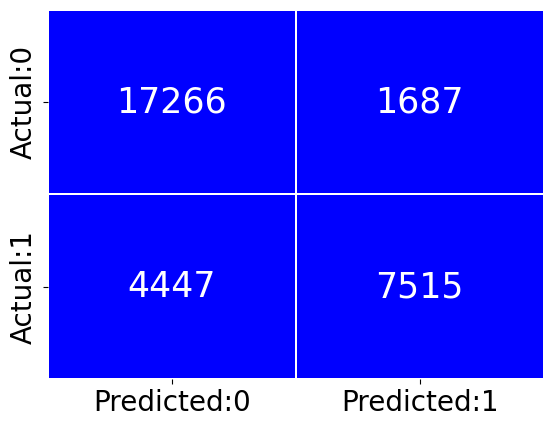

In [129]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In this case, lowering the False Negative is important that means increasing Recall

This means cancellation is "Yes"/1 but model is telling "NO"/0

## Compute various performance metrics

In [130]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

In [131]:
# calculate the precision value
precision = TP / (TP+FP)
precision

0.816670289067594

In [132]:
# calculate the recall value
recall = TP / (TP+FN)
recall

0.6282394248453436

In [133]:
# calculate the specificity value
specificity = TN / (TN+FP)
specificity

0.910990344536485

In [134]:
# calculate the f1_score
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.7101682101682102

In [135]:
# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.8015849911046418

In [136]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     18953
           1       0.82      0.63      0.71     11962

    accuracy                           0.80     30915
   macro avg       0.81      0.77      0.78     30915
weighted avg       0.80      0.80      0.80     30915



## PLot the ROC curve

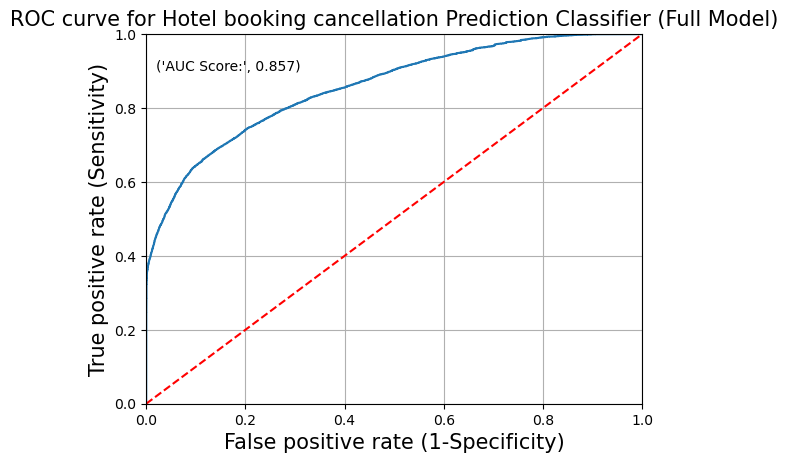

In [137]:
# the roc_curve() returns the values for false negative rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
plt.title('ROC curve for Hotel booking cancellation Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

## Identify the Best Cut-off Value

In [138]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for value in cutoff:
    update_score_card(logreg, value)

In [139]:
print('Score Card for Logistic regression:')

score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
 
score_card.style.highlight_max(color = 'lightblue', subset = ['Recall Score', 'Accuracy Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.625979,0.459543,0.977596,0.546466,0.208590,0.625197
1,0.200000,0.697451,0.526985,0.910968,0.649167,0.348120,0.667708
2,0.300000,0.748267,0.611873,0.828039,0.730228,0.466161,0.703730
3,0.400000,0.770033,0.711650,0.725631,0.780074,0.538117,0.718573
4,0.500000,0.769615,0.816670,0.628239,0.801585,0.563196,0.710168
5,0.600000,0.731715,0.902335,0.497408,0.784700,0.505246,0.641302
6,0.700000,0.696406,0.965268,0.401939,0.762995,0.440191,0.567550
7,0.800000,0.679572,0.988803,0.361729,0.751448,0.406713,0.529685
8,0.900000,0.676307,0.993665,0.354038,0.749183,0.400114,0.522066


## Youden's Index

In [140]:
youdens_table = pd.DataFrame({'TPR': tpr,
                              'FPR': fpr,
                              'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending=False).reset_index(drop=True)

youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.671292,0.124466,0.463633,0.546827
1,0.671292,0.124519,0.463632,0.546774
2,0.661679,0.114916,0.472383,0.546763
3,0.671460,0.124730,0.463412,0.546730
4,0.661010,0.114283,0.473229,0.546727


## Plotting the Confusion matrix by assigning cut-off value as 0.46

In [141]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.46 else 1 for x in y_pred_prob]

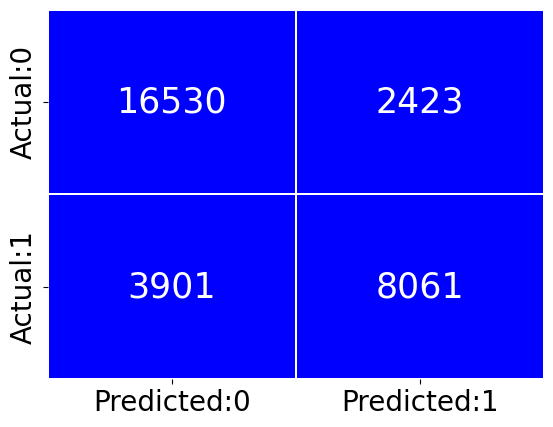

In [142]:
cm = confusion_matrix(y_test, y_pred_youden)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['blue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [143]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_youden)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     18953
           1       0.77      0.67      0.72     11962

    accuracy                           0.80     30915
   macro avg       0.79      0.77      0.78     30915
weighted avg       0.79      0.80      0.79     30915

